<a href="https://colab.research.google.com/github/mechamrit/StockAnalysis/blob/master/stock6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering for Diversification analysis
Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields. 

In [0]:
## Importing the Lib
import numpy as np
import pandas as pd
import os
import pandas_datareader.data as pdr
from datetime import datetime , timedelta

In [2]:
start = datetime(2018,5,5) 
end  = datetime(2019,5,5)

df1 = pdr.DataReader(['AMRS','AKTS','PTPF','ABIL','ICLK','GOOG','AAPL','MSFT','NCS','YRD','VXX','INDA','IEFA','ITB'], 'yahoo', start, end)
df2 = df1.Close
df2.head(5)

Symbols,AAPL,ABIL,AKTS,AMRS,GOOG,ICLK,IEFA,INDA,ITB,MSFT,NCS,PTPF,VXX,YRD
Date,,,,,,,,,,,,,,
2018-05-07,185.160004,2.590,5.72,6.43,1054.790039,7.53,66.940002,34.250000,39.150002,96.220001,18.150000,0.0120,39.750000,30.090000
2018-05-08,186.050003,2.842,5.69,5.97,1053.910034,7.40,66.959999,34.139999,39.310001,95.809998,18.350000,0.0085,39.750000,29.870001
2018-05-09,187.360001,2.710,5.93,5.71,1082.760010,7.32,67.099998,34.209999,38.590000,96.940002,18.500000,0.0199,38.790001,30.870001
2018-05-10,190.039993,2.770,5.92,5.83,1097.569946,7.25,67.500000,34.349998,38.759998,97.910004,18.549999,0.0199,36.709999,30.969999
2018-05-11,188.589996,2.750,6.81,5.84,1098.260010,7.65,67.709999,34.160000,38.970001,97.699997,18.500000,0.0199,35.830002,30.780001


Calculating average annual percentage return and volatility of all stocks over a theoretical one year period

In [3]:
returns = df2.pct_change().mean() *252
returns = pd.DataFrame(returns)
returns.columns = ['Return']
returns['Volatility'] = df2.pct_change().std() * np.sqrt(252)
returns

,Return,Volatility
Symbols,,
AAPL,0.179621,0.295538
ABIL,1.597892,2.509981
AKTS,0.317023,0.648140
AMRS,0.449997,1.245566
GOOG,0.153221,0.264798
ICLK,-0.469903,0.637923
IEFA,-0.056853,0.133383
INDA,0.058989,0.202472
ITB,0.012040,0.225622


 Cluster the stocks according to their mean annual Volatilities and Returns using K-means clustering. Identify the optimum number of clusters using the Elbow curve method 

In [4]:
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Return']),np.asarray(returns['Volatility'])]).T
data

array([[ 0.17962143,  0.29553801],
       [ 1.5978922 ,  2.50998066],
       [ 0.3170228 ,  0.6481399 ],
       [ 0.44999682,  1.24556646],
       [ 0.15322093,  0.2647979 ],
       [-0.46990329,  0.63792347],
       [-0.0568531 ,  0.1333831 ],
       [ 0.05898867,  0.20247194],
       [ 0.01204016,  0.22562162],
       [ 0.32819399,  0.25401578],
       [-1.01628571,  0.46811628],
       [ 1.47742785,  2.37746083],
       [-0.2828242 ,  0.59072271],
       [-0.32598403,  0.72471467]])

Text(0.5, 1.0, 'Elbow curve')

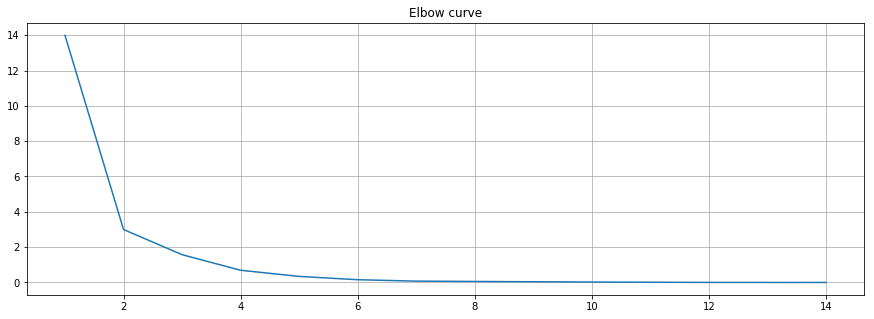

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = data
distorsions = []
for k in range(1, 15):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), distorsions)
plt.grid(True)
plt.title('Elbow curve')

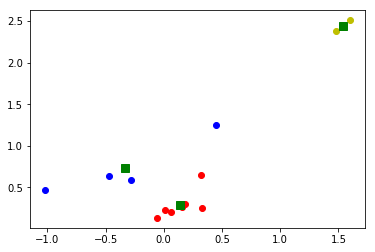

In [6]:
from pylab import plot,show
from scipy.cluster.vq import kmeans,vq

centroids,_ = kmeans(data,3)
idx,_ = vq(data,centroids)
plot(data[idx==0,0],data[idx==0,1],'ob',
    data[idx==1,0],data[idx==1,1],'oy',
    data[idx==2,0],data[idx==2,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [7]:
#identify the outlier
print(returns.idxmax())

Return        ABIL
Volatility    ABIL
dtype: object


In [0]:
returns.drop('ABIL',inplace=True)
data = np.asarray([np.asarray(returns['Return']),np.asarray(returns['Volatility'])]).T

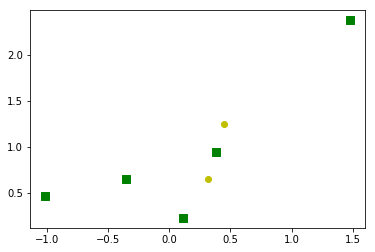

In [9]:
centroids,_ = kmeans(data,5)
idx,_ = vq(data,centroids)
plot(data[idx==0,0],data[idx==0,1],'ob',
    data[idx==1,0],data[idx==1,1],'oy',
    data[idx==2,0],data[idx==2,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [10]:
#identify the outlier
print(returns.idxmax())

Return        PTPF
Volatility    PTPF
dtype: object


In [0]:
returns.drop('PTPF',inplace=True)
data = np.asarray([np.asarray(returns['Return']),np.asarray(returns['Volatility'])]).T

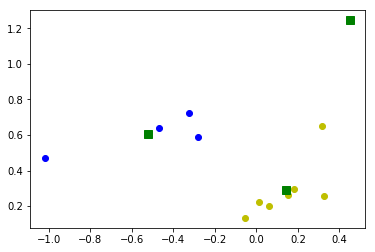

In [12]:
centroids,_ = kmeans(data,3)
idx,_ = vq(data,centroids)    
plot(data[idx==0,0],data[idx==0,1],'ob',
    data[idx==1,0],data[idx==1,1],'oy',
    data[idx==2,0],data[idx==2,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [13]:
#identify the outlier
print(returns.idxmax())

Return        AMRS
Volatility    AMRS
dtype: object


In [0]:
returns.drop('AMRS',inplace=True)
data = np.asarray([np.asarray(returns['Return']),np.asarray(returns['Volatility'])]).T

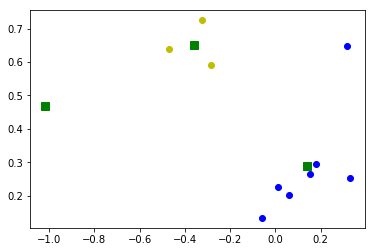

In [15]:
centroids,_ = kmeans(data,3)
idx,_ = vq(data,centroids)    
plot(data[idx==0,0],data[idx==0,1],'ob',
    data[idx==1,0],data[idx==1,1],'oy',
    data[idx==2,0],data[idx==2,1],'or')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [16]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]
for detail in details:
    print(detail)

('AAPL', 0)
('AKTS', 0)
('GOOG', 0)
('ICLK', 1)
('IEFA', 0)
('INDA', 0)
('ITB', 0)
('MSFT', 0)
('NCS', 2)
('VXX', 1)
('YRD', 1)
